# DataUnderstanding

### Importiere Bibliotheken

In [1]:
import pandas as pd

# region plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# endregion
import seaborn as sns

### Datensatz einlesen
Da Pandas die Datentypen der Merkmale nicht optimal erkennt, werden im Folgenden die konkreten Datentypen definiert. \
Diese können aus der Beschreibung des Datensatztes abgeleitet werden.

In [ ]:
dtypes = {
    'UDI': 'int32',
    'Product ID': 'str',
    'Type': 'category',
    'Air temperature [K]': 'float32',
    'Process temperature [K]': 'float32',
    'Rotational speed [rpm]': 'float32',
    'Torque [Nm]': 'float32',
    'Tool wear [min]': 'float32',
    'Machine failure': 'bool',
    'TWF': 'bool',
    'HDF': 'bool',
    'PWF': 'bool',
    'OSF': 'bool',
    'RNF': 'bool'
}

df = pd.read_csv('./dataset.csv', dtype=dtypes) #df = pd.read_csv('./dataset_prepeared.csv', dtype=dtypes)

### Beschreibung des Datensatzes
| Variable (Name)       | Beschreibung                                                                                           | Skalenniveau | Typ (Input/Output) |
|----------------------|------------------------------------------------------------------------------------------------------|--------------|-------------------|
| UID                  | Eindeutige Kennung (1–10.000)                                                                       | Nominal      | Input            |
| product ID           | spezifischer Seriennummer                                                                           | Nominal      | Input            |
| type                 | Produktvariante (L/M/H)                                                                             | Nominal      | Input            |
| air temperature [K]  | Lufttemperatur, normalisiert um 300 K mit Standardabweichung von 2 K                               | Metrisch     | Input            |
| process temperature [K] | Prozess-Temperatur, berechnet als Lufttemperatur + 10 K, mit Standardabweichung von 1 K       | Metrisch     | Input            |
| rotational speed [rpm] | Drehzahl, berechnet aus 2860 W mit überlagerter normalverteilter Störung                       | Metrisch     | Input            |
| torque [Nm]         | Drehmoment, normalverteilt um 40 Nm (σ = 10 Nm), keine negativen Werte                            | Metrisch     | Input            |
| tool wear [min]     | Werkzeugverschleiß, beeinflusst durch Produktqualität (H: +5 min, M: +3 min, L: +2 min)           | Metrisch     | Input            |
| machine failure     | Gibt an, ob ein Maschinenausfall vorliegt (1 = Ausfall, 0 = kein Ausfall)                         | Dichotom     | Output           |
| tool wear failure (TWF) | Werkzeugverschleißbedingter Ausfall, wenn Verschleiß zwischen 200–240 min erreicht wird     | Dichotom     | Output            |
| heat dissipation failure (HDF) | Ausfall, wenn Temperaturdifferenz < 8.6 K und Drehzahl < 1380 rpm                      | Dichotom     | Output            |
| power failure (PWF) | Ausfall, wenn Leistung < 3500 W oder > 9000 W                                                      | Dichotom     | Output            |
| overstrain failure (OSF) | Ausfall, wenn Produkt aus Werkzeugverschleiß und Drehmoment einen Schwellenwert überschreitet | Dichotom     | Output            |
| random failures (RNF) | Zufälliger Prozessausfall mit Wahrscheinlichkeit von 0,1 %                                      | Dichotom     | Output            |

<font color='lightgreen'>Da die Fehlertypen schon als Dichtom vorliegen, müssen keine Dummy-Variablen abgeleitet werden.</font>

### Analysiere die Merkmale des Datensatzes

In [3]:
df.describe(include='all')

UDI Product ID   Type  Air temperature [K]  \
count   10000.00000      10000  10000         10000.000000   
unique          NaN      10000      3                  NaN   
top             NaN     M14860      L                  NaN   
freq            NaN          1   6000                  NaN   
mean     5000.50000        NaN    NaN           300.004913   
std      2886.89568        NaN    NaN             2.000259   
min         1.00000        NaN    NaN           295.299988   
25%      2500.75000        NaN    NaN           298.299988   
50%      5000.50000        NaN    NaN           300.100006   
75%      7500.25000        NaN    NaN           301.500000   
max     10000.00000        NaN    NaN           304.500000   

        Process temperature [K]  Rotational speed [rpm]   Torque [Nm]  \
count              10000.000000            10000.000000  10000.000000   
unique                      NaN                     NaN           NaN   
top                         NaN                     NaN           NaN   
freq                        NaN                     NaN           NaN   
mean                 310.005554             1538.776123     39.986908   
std                    1.483734              179.284103      9.968934   
min                  305.700012             1168.000000      3.800000   
25%                  308.799988             1423.000000     33.200001   
50%                  310.100006             1503.000000     40.099998   
75%                  311.100006             1612.000000     46.799999   
max                  313.799988             2886.000000     76.599998   

        Tool wear [min] Machine failure    TWF    HDF    PWF    OSF    RNF  
count      10000.000000           10000  10000  10000  10000  10000  10000  
unique              NaN               2      2      2      2      2      2  
top                 NaN           False  False  False  False  False  False  
freq                NaN            9661   9954   9885   9905   9902   9981  
mean         107.950996             NaN    NaN    NaN    NaN    NaN    NaN  
std           63.654148             NaN    NaN    NaN    NaN    NaN    NaN  
min            0.000000             NaN    NaN    NaN    NaN    NaN    NaN  
25%           53.000000             NaN    NaN    NaN    NaN    NaN    NaN  
50%          108.000000             NaN    NaN    NaN    NaN    NaN    NaN  
75%          162.000000             NaN    NaN    NaN    NaN    NaN    NaN  
max          253.000000             NaN    NaN    NaN    NaN    NaN    NaN

### Prüfe auf Duplikate und fehlende Werte

In [4]:
print(f'Duplikate: {df.duplicated().sum()}')
print(f'Fehlende Werte: {df.isnull().any(axis=1).sum()}')

Duplikate: 0
Fehlende Werte: 0


<font color='lightgreen'>Da keine Zeilen doppelt vorliegen oder fehlende Werte beinhalten, ist kein entsprechender Umgang Notwendig.</font>

### Visualisierung des Datensatztes

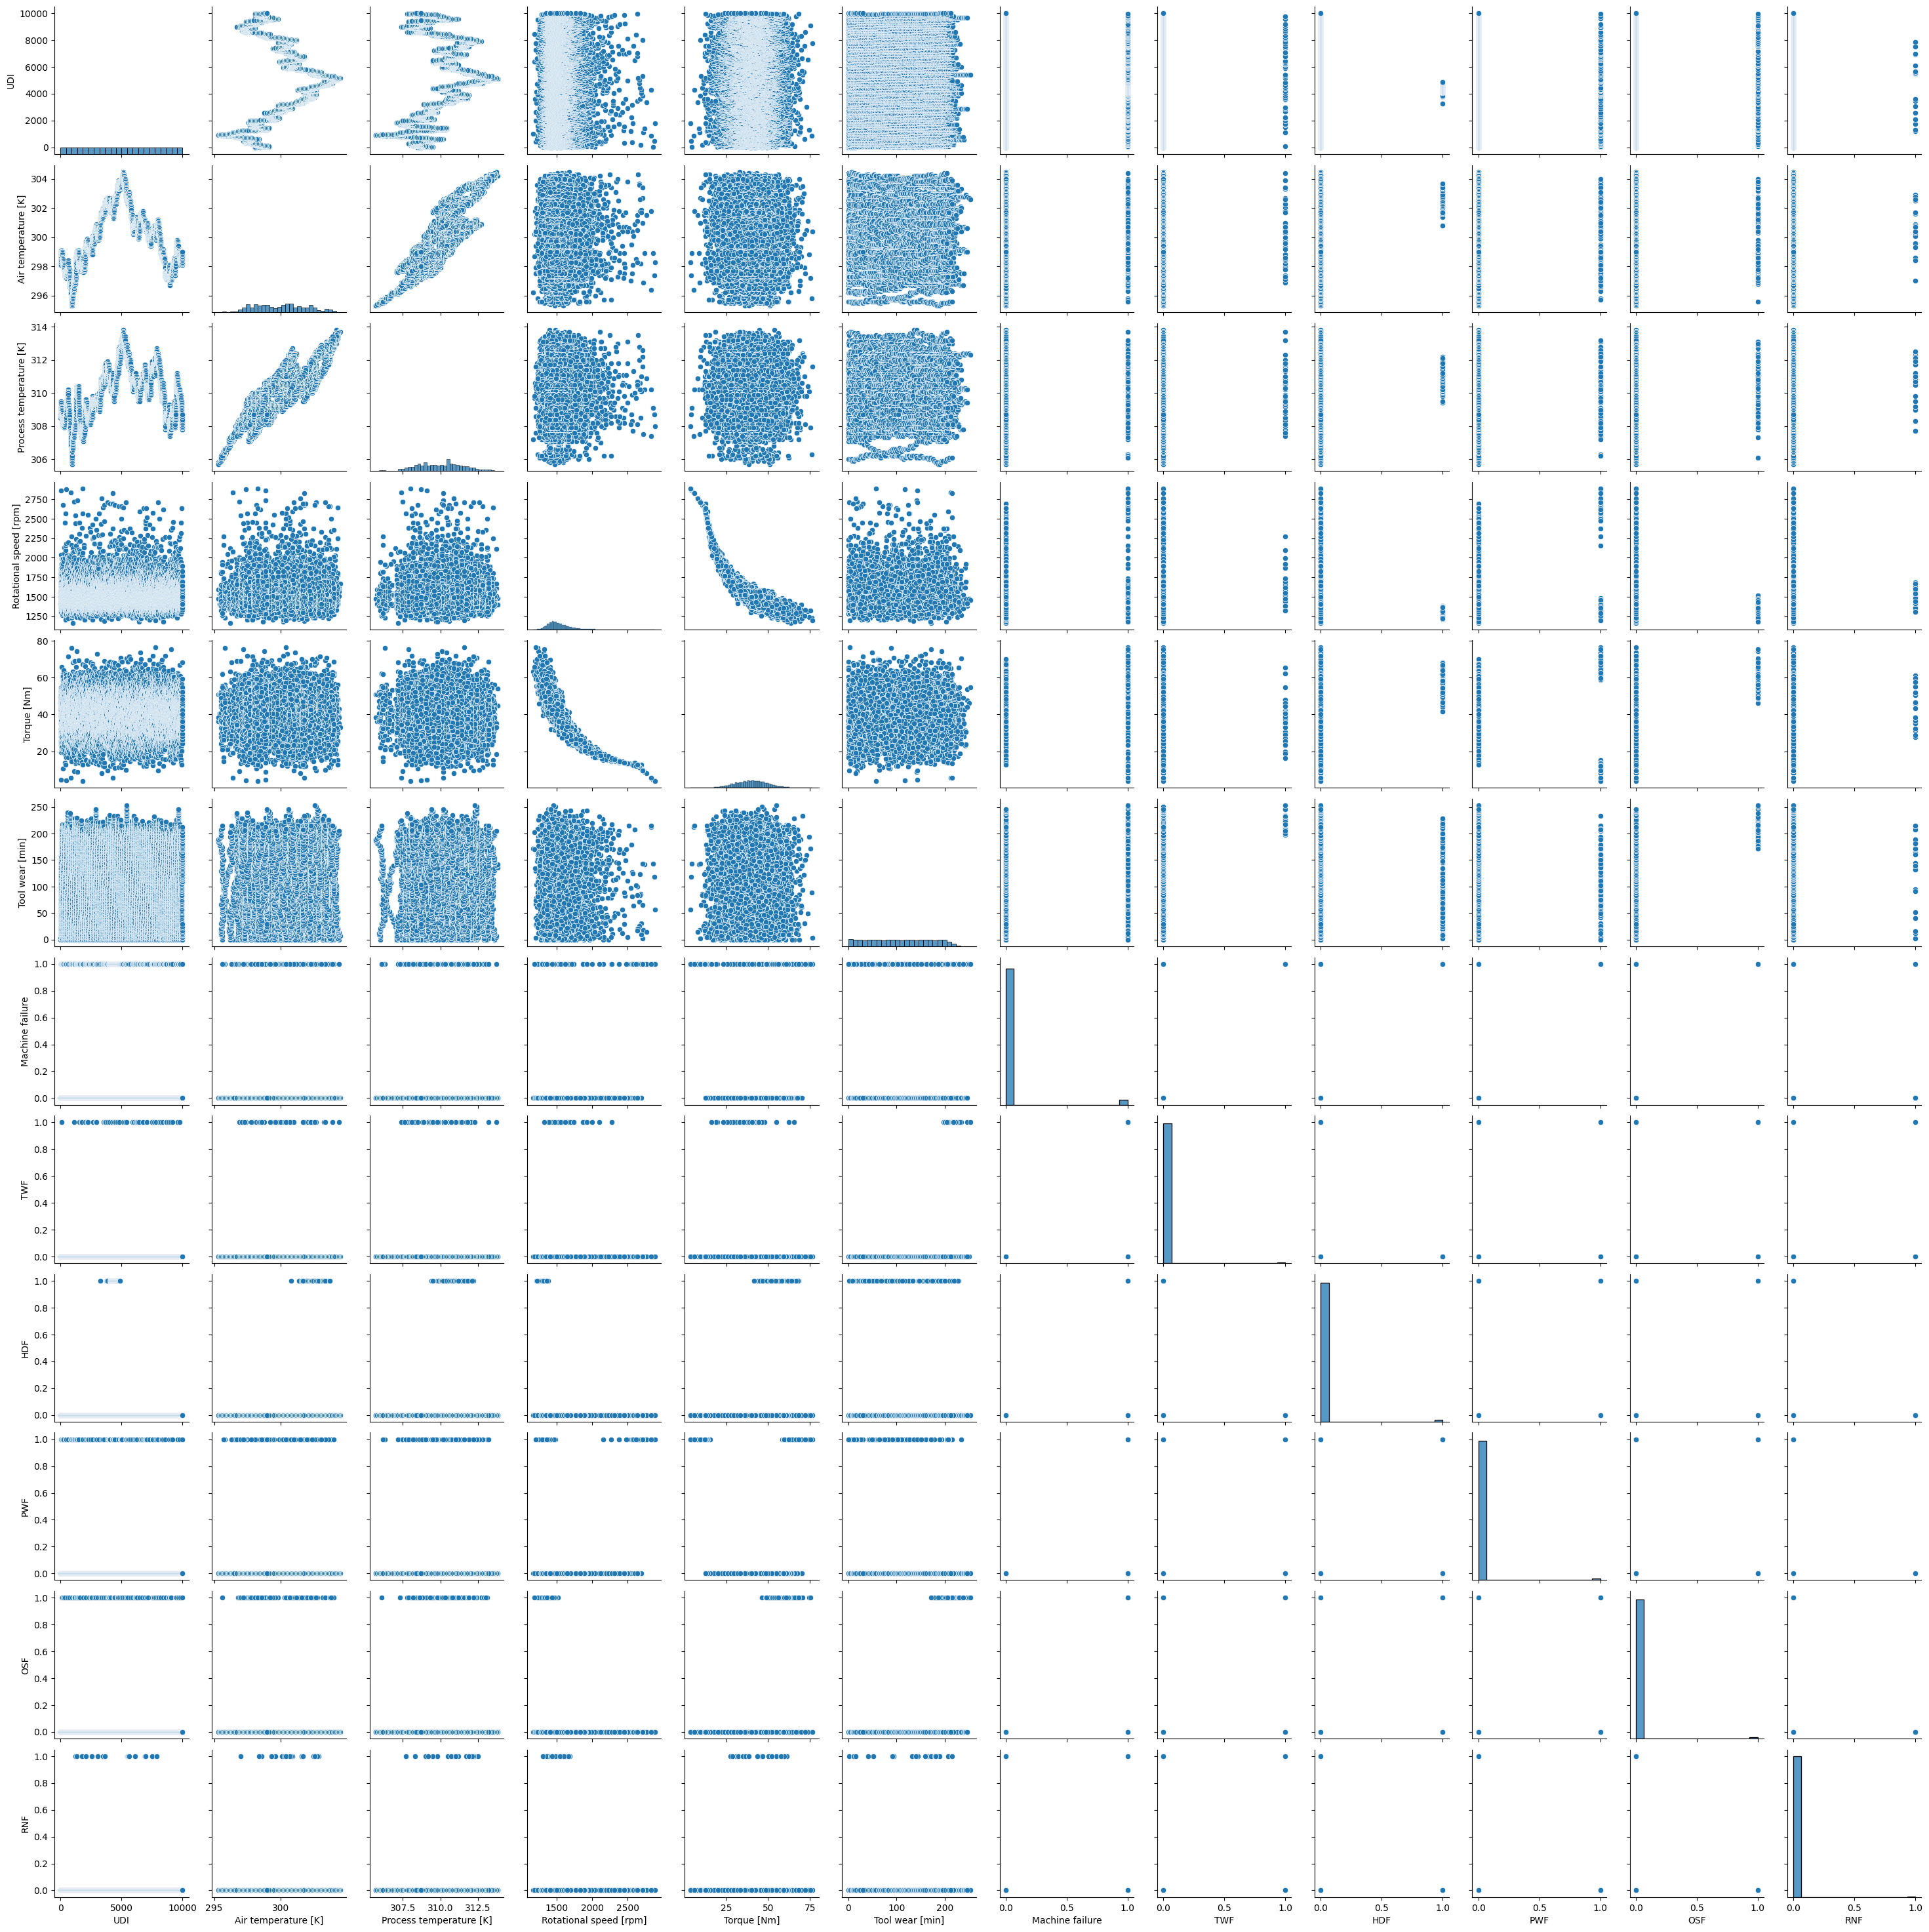

In [5]:
sns.pairplot(df)

In [6]:
failure_counts = df.groupby(['Type', 'Machine failure'], observed=False).size().unstack(fill_value=0)
failure_counts.loc['Alle'] = failure_counts.sum()

fig = px.bar(
    failure_counts,
    x=failure_counts.index,
    y=[False, True],
    labels={'x': 'Machine Type', 'value': 'Count', 'variable': 'Machine Failure'},
    color_discrete_map={False: 'green', True: 'red'},
    barmode='stack'
)

fig.update_layout(
    title='Maschinen-Fehler nach Maschinen-Typ',
    xaxis_title='Typ',
    yaxis_title='Anzahl',
    legend_title='Maschinen-Fehler'
)

fig.show()

<font color='lightgreen'>Dies verdeutlicht die 1. Unausgeglichenheit des Datensatztes, da der Datensatz weitaus weniger Einträge über Maschinen enthält, die keinen Defekt aufweisen (ledeglich 3,39%).</font>

In [7]:
relevant_types = ['H', 'L', 'M']

fig = make_subplots(
    rows=1, cols=4, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]]
)

failure_counts_per_type = {
    'Tool Wear': df['TWF'].sum(),
    'Heat Dissipation': df['HDF'].sum(),
    'Power': df['PWF'].sum(),
    'Overstrain': df['OSF'].sum(),
    'Random': df['RNF'].sum()
}

fig.add_trace(go.Pie(
    labels=list(failure_counts_per_type.keys()),
    values=list(failure_counts_per_type.values()),
    hole=0.3,
    title=f"Typ: Alle"
), row=1, col=1)


for i, relevant_type in enumerate(relevant_types):
    subset = df[df['Type'] == relevant_type]

    failure_counts_per_type = {
        'Tool Wear': subset['TWF'].sum(),
        'Heat Dissipation': subset['HDF'].sum(),
        'Power': subset['PWF'].sum(),
        'Overstrain': subset['OSF'].sum(),
        'Random': subset['RNF'].sum()
    }
    
    fig.add_trace(go.Pie(
        labels=list(failure_counts_per_type.keys()),
        values=list(failure_counts_per_type.values()),
        hole=0.3,
        title=f"Typ: {relevant_type}"
    ), row=1, col=i+2)


fig.update_layout(
    title='Fehler-Typen nach Maschinen-Typ',
    legend_title='Fehler-Typen'
)

fig.show()

<font color='lightgreen'>Dies verdeutlicht die 2. Unausgeglichenheit des Datensatztes, da selbst die Verteilung innerhalb der Fehlerklassen sehr groß ist.</font>\
<font color='lightgreen'>Gegeben durch die Unausgeglichenheiten 1 und 2, muss später ein entsprechendes Over- / Under- sampling erfolgen</font>

In [8]:
relevant_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for relevant_feature in relevant_features:

    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.7, 0.3],
        subplot_titles=[f'{relevant_feature} mit Maschinen-Fehler Indikatoren', 'Fehler-Typ Verteilung']
    )

    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[relevant_feature],
            mode='lines',
            line=dict(color='blue'),
            name=relevant_feature
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df[df['Machine failure']].index,
            y=df.loc[df['Machine failure'], relevant_feature],
            mode='markers',
            marker=dict(color='red', size=5),
            name='Machine Failure'
        ),
        row=1, col=1
    )

    failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

    for failure in failure_types:
        fig.add_trace(
            go.Box(
                y=df.loc[df[failure], relevant_feature],
                name=failure,
                #boxpoints='all',
                marker=dict(size=3)
            ),
            row=1, col=2
        )

    fig.update_layout(
        title_text=f'{relevant_feature} mit Maschinen-Fehler Indikatoren und Verteilung nach Fehler-Typ',
        xaxis_title='Datenpunkt Index',
        yaxis_title=relevant_feature,
        legend_title='Legende'
    )

    fig.show()

In [9]:
relevant_types = ['H', 'L', 'M']
relevant_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


fig = make_subplots(
    rows=1, cols=3, subplot_titles=relevant_types
)

for i, relevant_type in enumerate(relevant_types):
    subset = df[df['Type'] == relevant_type]
    
    corr_matrix = subset[relevant_features].corr()
    
    heatmap = go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        text=corr_matrix.round(2).values,
        texttemplate="%{text}",
    )
    
    fig.add_trace(heatmap, row=1, col=i+1)

fig.update_layout(
    title='Korrelations-Matrix nach Maschinen-Typ',
    showlegend=False
)

fig.update_yaxes(showticklabels=True, row=1, col=1)
fig.update_yaxes(showticklabels=False, row=1, col=2)
fig.update_yaxes(showticklabels=False, row=1, col=3)

fig.show()